# 552_Homework_1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

## A

In [5]:
df_2C = pd.read_csv('../data/vertebral_column_data/column_2C.dat', sep=' ', header=None, names=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','spondylolisthesis_grade','label'])
df_2C.label = df_2C.label.apply(lambda x: '1' if x=='AB' else '0')

In [6]:
df_2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pelvic_incidence         310 non-null    float64
 1   pelvic_tilt              310 non-null    float64
 2   lumbar_lordosis_angle    310 non-null    float64
 3   sacral_slope             310 non-null    float64
 4   pelvic_radius            310 non-null    float64
 5   spondylolisthesis_grade  310 non-null    float64
 6   label                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


(b) Pre-Processing and Exploratory data analysis:
1. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.
2. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).
3. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

## B(i)

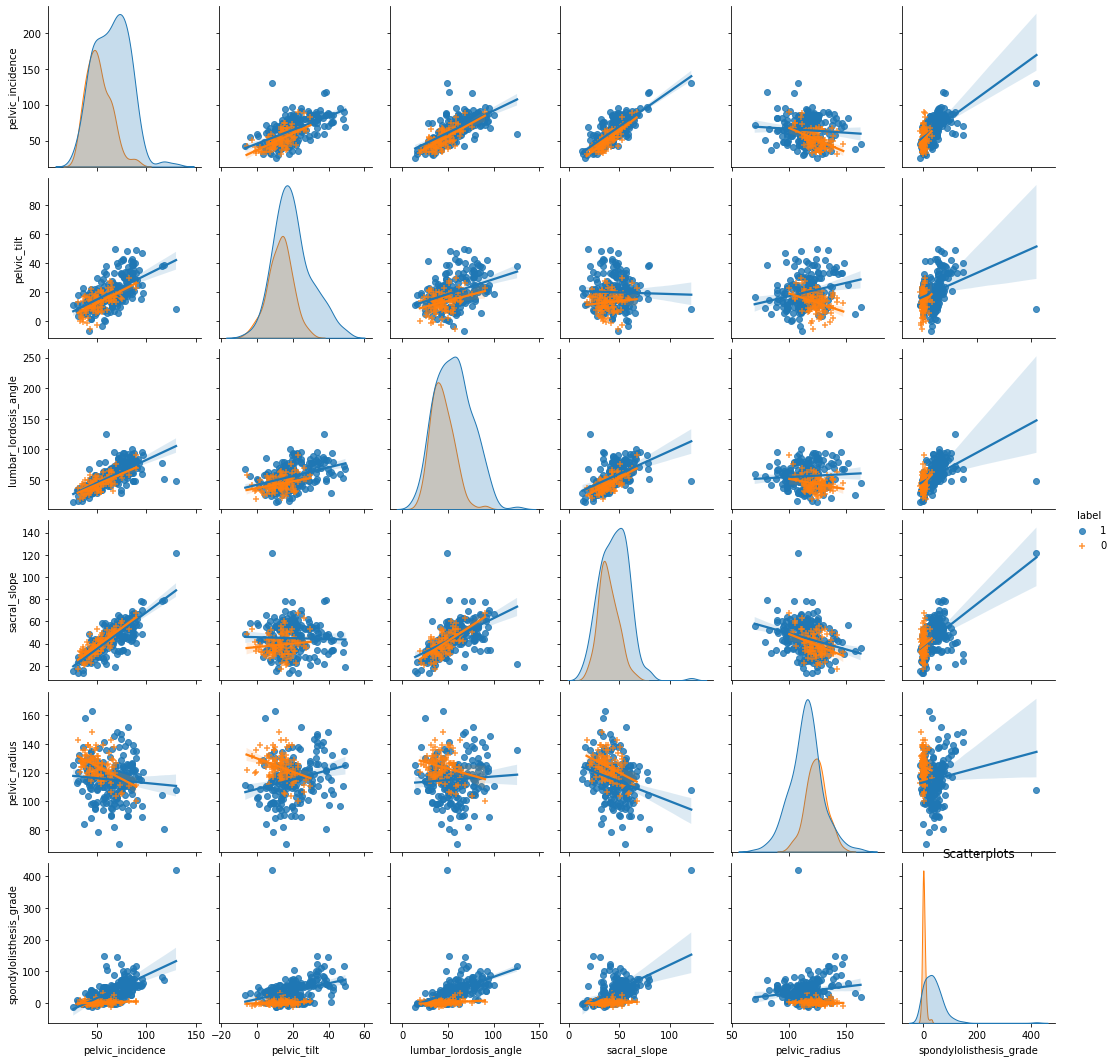

In [7]:
# Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

sns.pairplot(data=df_2C, hue='label', markers=['o','+'], kind='reg') # kind('scatter'/'reg'); diag_kind('hist'/'kde'); vars=[]
plt.title('Scatterplots')
plt.show()

## B(ii)

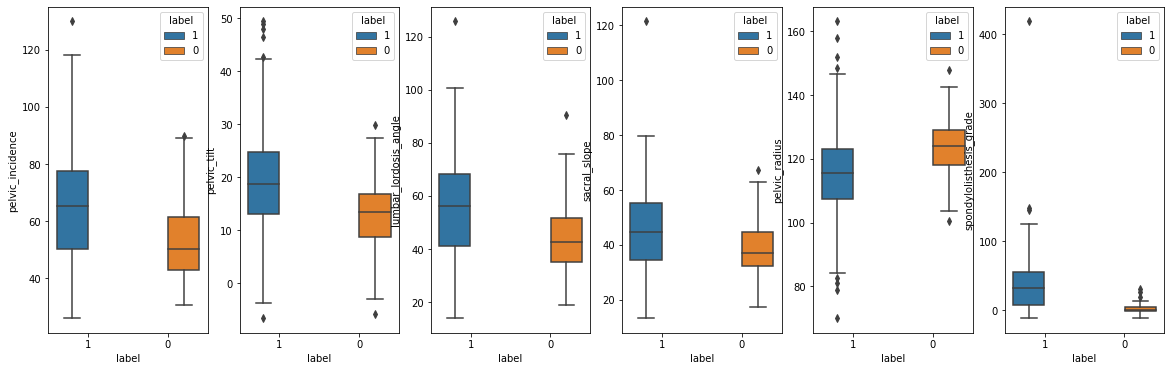

In [8]:
# Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).
plt.figure(figsize=(20, 6))
plt.subplot(1, 6, 1)
sns.boxplot(data=df_2C, x='label', y='pelvic_incidence', hue='label')
plt.subplot(1, 6, 2)
sns.boxplot(data=df_2C, x='label', y='pelvic_tilt', hue='label')
plt.subplot(1, 6, 3)
sns.boxplot(data=df_2C, x='label', y='lumbar_lordosis_angle', hue='label')
plt.subplot(1, 6, 4)
sns.boxplot(data=df_2C, x='label', y='sacral_slope', hue='label')
plt.subplot(1, 6, 5)
sns.boxplot(data=df_2C, x='label', y='pelvic_radius', hue='label')
plt.subplot(1, 6, 6)
sns.boxplot(data=df_2C, x='label', y='spondylolisthesis_grade', hue='label')
plt.show()

## B(iii)

In [9]:
# Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

df_NO = df_2C[df_2C['label']=='0'] #class0
df_AB = df_2C[df_2C['label']=='1'] #class1
train = pd.concat([df_NO[:70], df_AB[:140]], ignore_index=True)
test = pd.concat([df_NO[70:], df_AB[140:]], ignore_index=True)

---

## C(i)

In [10]:
# Test all the data in the test database with k nearest neighbors.

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Model assessing：')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:', '\n', cm)
print('true positive rate: TP/(TP+FN)=', cm[1][1]/(cm[1][1]+cm[1][0]))
print('true negative rate: TN/(TN+FP)=', cm[0][0]/(cm[0][0]+cm[0][1]))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, labels=None, pos_label='1', average='binary'))
print('Recall: ', recall_score(y_test, y_pred, labels=None, pos_label='1', average='binary', sample_weight=None))
print('F1 score: %.5f' % f1_score(y_test, y_pred, labels=None, pos_label='1', average='binary', sample_weight=None))    
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred))

Model assessing：
confusion_matrix: 
 [[20 10]
 [ 0 70]]
true positive rate: TP/(TP+FN)= 1.0
true negative rate: TN/(TN+FP)= 0.6666666666666666
Accuracy: 0.90000
Precision:  0.875
Recall:  1.0
F1 score: 0.93333
roc_auc_score: 0.83333


## C(ii)

Text(0, 0.5, 'Test Error')

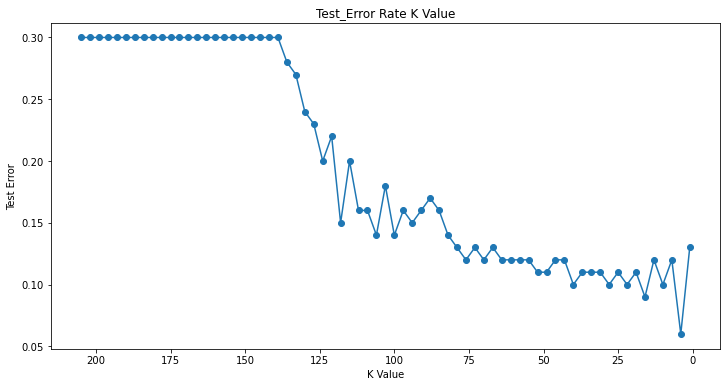

In [11]:
# Plot test errors in terms of k 

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

error_test = []
for i in range(1, 208, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    error_test.append(1-knn.score(x_test, y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 208, 3), error_test, marker='o')
plt.title('Test_Error Rate K Value')
ax = plt.gca()
ax.invert_xaxis()  
plt.xlabel('K Value')
plt.ylabel('Test Error')

Text(0, 0.5, 'Train Error')

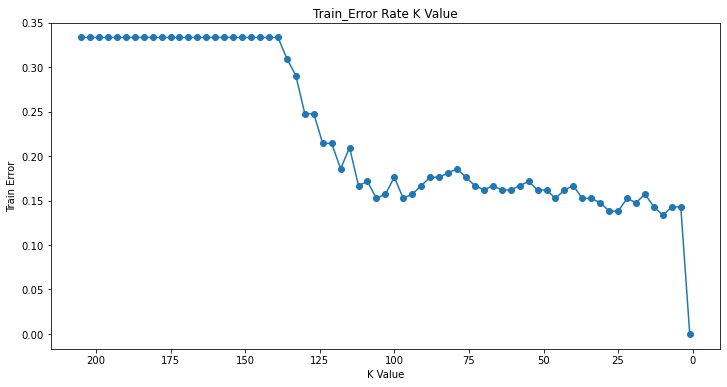

In [12]:
# Plot train and test errors in terms of k 

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

error_train = []
for i in range(1, 208, 3):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    error_train.append(1-knn.score(x_train, y_train))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 208, 3), error_train, marker='o')
plt.title('Train_Error Rate K Value')
ax = plt.gca()
ax.invert_xaxis()  
plt.xlabel('K Value')
plt.ylabel('Train Error')

In [13]:
min(error_train)

0.0

In [14]:
min(error_test)

0.06000000000000005

**k=4, test error is minimum = 0.06**

In [15]:
x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Model assessing：')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix:', '\n', cm)
print('true positive rate: TP/(TP+FN)=', cm[1][1]/(cm[1][1]+cm[1][0]))
print('true negative rate: TN/(TN+FP)=', cm[0][0]/(cm[0][0]+cm[0][1]))
print ('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, labels=None, pos_label='1', average='binary'))
print('Recall: ', recall_score(y_test, y_pred, labels=None, pos_label='1', average='binary', sample_weight=None))
print('F1 score: %.5f' % f1_score(y_test, y_pred, labels=None, pos_label='1', average='binary', sample_weight=None))    
print('roc_auc_score: %.5f' % roc_auc_score(y_test, y_pred))

Model assessing：
confusion_matrix: 
 [[25  5]
 [ 1 69]]
true positive rate: TP/(TP+FN)= 0.9857142857142858
true negative rate: TN/(TN+FP)= 0.8333333333333334
Accuracy: 0.94000
Precision:  0.9324324324324325
Recall:  0.9857142857142858
F1 score: 0.95833
roc_auc_score: 0.90952


## C(iii)

In [16]:
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()
error = []
best_k = []
for N in range(10,210,10):
    train_class0 = train[train['label']=='0'] #class0
    train_class1 = train[train['label']=='1'] #class1
    train_N = pd.concat([train_class0[:int(N/3)], train_class1[:(N-int(N/3))]], ignore_index=True)
    x_train = train_N.iloc[:,:6]
    y_train = train_N.iloc[:,6:].values.ravel()
    
    score = []
    for k in range(1,N,5):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        score.append([knn.score(x_test, y_test),k])
    best_k.append(max(score)[1])
    
    knn = KNeighborsClassifier(n_neighbors=max(score)[1])
    knn.fit(x_train, y_train)
    error.append(1-knn.score(x_test, y_test))

Text(0, 0.5, 'Test Error')

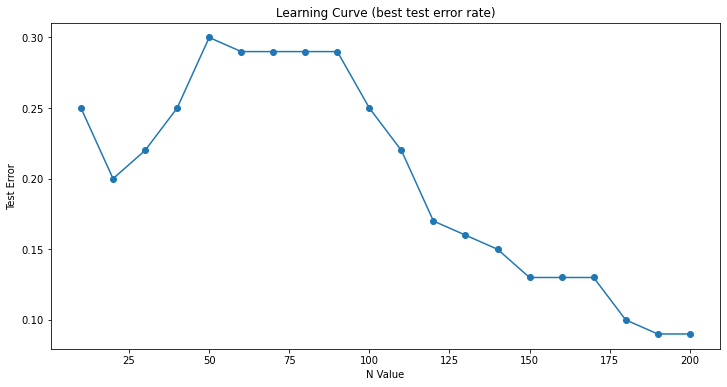

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(10,210,10), error, marker='o')
plt.title('Learning Curve (best test error rate)')
plt.xlabel('N Value')
plt.ylabel('Test Error')

---

## D(i)

In [18]:
# Manhattan Distance with p = 1

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,k,test_error
1,6,0.11
2,11,0.11
5,26,0.11
0,1,0.12
3,16,0.12


**Best k = 6, 11, 26, when using Manhattan Distance**

In [19]:
# Minkowski Distance B

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for i in np.arange(0.1,1.1,0.1):
    p = pow(10,i)
    knn = KNeighborsClassifier(n_neighbors=26, p=p, metric='minkowski')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),i])
best_k = min(score)[1]
best_test_error = min(score)[0]
i = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'log10(p)':i, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,log10(p),test_error
0,0.1,0.10
1,0.2,0.10
3,0.4,0.10
5,0.6,0.10
2,0.3,0.11


**Best log10(p) = 0.1, 0.2, 0.4, 0.6**

In [20]:
# Chebyshev Distance with p → ∞

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,k,test_error
3,16,0.08
1,6,0.10
7,36,0.10
4,21,0.11
15,76,0.11


**Best k = 16, when using Chebyshev Distance**

## D(ii)

In [21]:
# Mahalanobis Distance

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': np.cov(x_train, rowvar=False)})
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn(
D:\Softwares Installed\Anaconda\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning: from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
 

,k,test_error
0,1,0.17
1,6,0.17
2,11,0.20
3,16,0.20
5,26,0.20


**Best k = 1, 6, when using Mahalanobis Distance**

---

## E

In [22]:
#  Euclidean with weight

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski', weights='distance')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,k,test_error
1,6,0.10
11,56,0.11
14,71,0.11
13,66,0.11
12,61,0.11


**Best k = 6, min test error = 0.1**

In [23]:
#  Manhattan with weight

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, p=1, metric='minkowski', weights='distance')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,k,test_error
5,26,0.10
1,6,0.11
2,11,0.11
4,21,0.11
6,31,0.11


**Best k = 26, min test error = 0.1**

In [24]:
#  Chebyshev with weight

x_train = train.iloc[:,:6]
y_train = train.iloc[:,6:].values.ravel()
x_test = test.iloc[:,:6]
y_test = test.iloc[:,6:].values.ravel()

score = []
for k in range(1,200,5):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights='distance')
    knn.fit(x_train, y_train)
    score.append([(1-knn.score(x_test, y_test)),k])
best_k = min(score)[1]
best_test_error = min(score)[0]
k = [i[1] for i in score]
test_error = [i[0] for i in score]
df_s = pd.DataFrame({'k':k, 'test_error':test_error})
df_s.sort_values('test_error')[:5]

,k,test_error
3,16,0.11
6,31,0.11
7,36,0.11
8,41,0.11
12,61,0.11


**min test error = 0.11**

## F 
- What is the lowest training error rate you achieved in this homework?

**k=1, min_error_train=0**  
**k=16, min_error_test=0.08**